In [ ]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

### IMPORT SCRAPED HOTEL-LEVEL DATA FROM POSTGRESQL

In [ ]:
engine = create_engine('postgresql://puneetjaiswal@localhost:5432/hotels')

In [ ]:
engine.table_names

In [ ]:
df = pd.read_sql_query('select * from "hotels_v2"',con=engine)

In [ ]:
df.shape

(467, 27)

In [ ]:
df.head()

id                                               name          n_reviews  \
0   1          {"\n","\nLoews Regency New York Hotel\n"}  {"1,355 reviews"}   
1   2  {"\n","\nThe Towers of the Waldorf Astoria - T...  {"2,016 reviews"}   
2   3  {"\n","\nLangham Place, New York, Fifth Avenue...  {"2,065 reviews"}   
3   4                              {"\n","\nThe Mark\n"}    {"687 reviews"}   
4   5                {"\n","\nThe St. Regis New York\n"}    {"633 reviews"}   

                                   st_addr               city state  \
0                      {"540 Park Avenue"}  {"New York City"}  {NY}   
1                        {"100 E 50th St"}  {"New York City"}  {NY}   
2                     {"400 Fifth Avenue"}  {"New York City"}  {NY}   
3        {"Madison Avenue at 77th Street"}  {"New York City"}  {NY}   
4  {"2 East 55th Street, at Fifth Avenue"}  {"New York City"}  {NY}   

         zip_cd excellent_ct verygood_ct average_ct  \
0  {10065-7366}        {952}       {162}       {62}   
1  {10022-6844}    {"1,381"}       {245}      {107}   
2  {10018-2753}    {"1,417"}       {203}       {72}   
3       {10078}        {464}        {87}       {24}   
4       {10022}        {448}        {70}       {34}   

                         ...                           spring   summer  \
0                        ...                          {(315)}  {(346)}   
1                        ...                          {(420)}  {(528)}   
2                        ...                          {(432)}  {(453)}   
3                        ...                          {(114)}  {(180)}   
4                        ...                          {(124)}  {(140)}   

      fall   winter   rank                                         highlights  \
0  {(273)}  {(286)}  {#27}  {"\n","\nFree High Speed Internet ( WiFi )\n",...   
1  {(382)}  {(500)}  {#26}  {"\n","\nRestaurant\n","\n","\nRoom Service\n"...   
2  {(415)}  {(443)}  {#25}  {"\n","\nFree High Speed Internet ( WiFi )\n",...   
3  {(156)}  {(139)}  {#24}  {"\n","\nFree High Speed Internet ( WiFi )\n",...   
4  {(141)}  {(168)}  {#30}  {"\n","\nFree High Speed Internet ( WiFi )\n",...   

                                              prange     rooms  \
0  {"\n$379 - $794 (Based on Average Rates for a ...  {" 379"}   
1  {"\n$719 - $10,000 (Based on Average Rates for...  {" 177"}   
2  {"\n$470 - $956 (Based on Average Rates for a ...  {" 214"}   
3  {"\n$503 - $1,027 (Based on Average Rates for ...  {" 152"}   
4  {"\n$762 - $1,370 (Based on Average Rates for ...  {" 229"}   

                                              hclass  \
0  {"\n","3.5 star — Loews Regency New York Hotel...   
1  {"\n","5 star — The Towers of the Waldorf Asto...   
2  {"\n","5 star — Langham Place, New York, Fifth...   
3                      {"\n","5 star — The Mark 5*"}   
4        {"\n","5 star — The St. Regis New York 5*"}   

                                         description  
0  {"All the benefits of Midtown Manhattan at you...  
1  {"The Waldorf Astoria New York is currently cl...  
2  {"Gracefully complementing Manhattan's luxurio...  
3  {"The Mark is housed, as it has always been, i...  
4  {"The St. Regis New York in midtown Manhattan ...  

[5 rows x 27 columns]

### DATA CLEANING:

### HOTEL RANKS

In [ ]:
df['rank'].unique()

array([u'{#27}', u'{#26}', u'{#25}', u'{#24}', u'{#30}', u'{#57}',
       u'{#90}', u'{#29}', u'{#28}', u'{#23}', u'{#60}', u'{#59}',
       u'{#58}', u'{#299}', u'{#89}', u'{#88}', u'{#87}', u'{#120}',
       u'{#119}', u'{#118}', u'{#240}', u'{#357}', u'{#117}', u'{#150}',
       u'{#149}', u'{#148}', u'{#147}', u'{#180}', u'{#179}', u'{#239}',
       u'{}', u'{#178}', u'{#177}', u'{#210}', u'{#209}', u'{#208}',
       u'{#207}', u'{#238}', u'{#237}', u'{#270}', u'{#269}', u'{#268}',
       u'{#267}', u'{#300}', u'{#441}', u'{#298}', u'{#297}', u'{#330}',
       u'{#329}', u'{#328}', u'{#327}', u'{#360}', u'{#359}', u'{#358}',
       u'{#442}', u'{#390}', u'{#389}', u'{#388}', u'{#387}', u'{#421}',
       u'{#419}', u'{#418}', u'{#417}', u'{#449}', u'{#448}', u'{#447}',
       u'{#446}', u'{#444}', u'{#445}', u'{#443}', u'{#440}', u'{#439}',
       u'{#438}', u'{#437}', u'{#436}', u'{#435}', u'{#434}', u'{#433}',
       u'{#432}', u'{#431}', u'{#430}', u'{#429}', u'{#428}', u'{#427}'

In [ ]:
df['rank_num'] = df['rank'].apply(lambda x: ''.join(c for c in x if c not in '{}#'))

In [ ]:
print len(df.rank_num.unique())

450


In [ ]:
ranks_list = df.rank_num.unique().tolist()

In [ ]:
ranks_list = [int(x) for x in ranks_list if x]

In [ ]:
df['rank_num'] = df.rank_num.apply(lambda x: int(x) if x != '' else None)

In [ ]:
ranks_list = sorted(ranks_list)

In [ ]:
def consec_vls_chck(list):
    gaps = []
    for idx, value in enumerate(list):
        if idx < (len(list) - 1):
            if list[idx] != list[idx+1] - 1:
                gaps.append(list[idx])
    return gaps

In [ ]:
consec_vls_chck(ranks_list)

[]

In [ ]:
print len(ranks_list)

449


In [ ]:
ranks_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [ ]:
df.rank_num.describe()

count    449.000000
mean     225.000000
std      129.759393
min        1.000000
25%      113.000000
50%      225.000000
75%      337.000000
max      449.000000
Name: rank_num, dtype: float64

### HOTEL DESCRIPTION

In [ ]:
df['description'] = df['description'].apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [ ]:
df.description.head()

0    All the benefits of Midtown Manhattan at your ...
1    The Waldorf Astoria New York is currently clos...
2    Gracefully complementing Manhattan's luxurious...
3    The Mark is housed, as it has always been, in ...
4    The St. Regis New York in midtown Manhattan of...
Name: description, dtype: object

### NUMBER OF ROOMS

In [ ]:
#first copy room values from prange column when they ended up there to rooms column:
df.ix[df.prange.str.contains('Number of rooms'), 'rooms'] = df.ix[df.prange.str.contains('Number of rooms'), 'prange']

In [ ]:
df['rooms'] = df['rooms'].apply(lambda x: ''.join(c for c in x if c not in '{} "'))

In [ ]:
df['rooms'] = df['rooms'].apply(lambda x: x.replace("Numberofrooms:,",""))

In [ ]:
df.rooms.unique()

array([u'379', u'177', u'214', u'152', u'229', u'100', u'222', u'463',
       u'197', u'230', u'111', u'278', u'242', u'47', u'190', u'86',
       u'183', u'77', u'391', u'178', u'217', u'24', u'135', u'120',
       u'141', u'125', u'312', u'34', u'533', u'218', u'291', u'160',
       u'132', u'611', u'263', u'127', u'184', u'140', u'1235', u'509',
       u'110', u'273', u'199', u'101', u'208', u'64', u'92', u'50', u'56',
       u'85', u'78', u'325', u'375', u'170', u'612', u'22', u'9', u'103',
       u'57', u'44', u'45', u'65', u'4', '', u'130', u'327', u'344',
       u'150', u'118', u'250', u'310', u'251', u'145', u'355', u'159',
       u'52', u'41', u'1705', u'60', u'80', u'43', u'62', u'268', u'33',
       u'105', u'30', u'37', u'40', u'347', u'228', u'15', u'328', u'156',
       u'106', u'32', u'700', u'378', u'129', u'192', u'128', u'74', u'25',
       u'53', u'286', u'96', u'83', u'148', u'73', u'597', u'866', u'107',
       u'27', u'12', u'20', u'70', u'1013', u'38', u'317', u'

In [ ]:
df['rooms_num'] = df.rooms.apply(lambda x: int(x) if x != '' else None)

In [ ]:
df.rooms_num.isnull().sum()

8

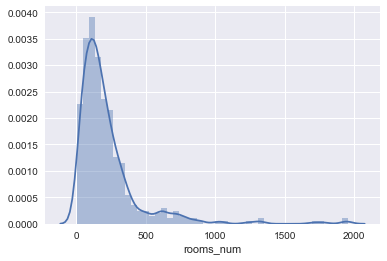

In [ ]:
sns.distplot(df[df.rooms_num >= 0].rooms_num);

### PRICE RANGE

In [ ]:
#first remove room values from prange column when they ended up there:
df.ix[df.prange.str.contains('Number of rooms'), 'prange'] = '{}'

In [ ]:
#remove bad characters
df['prange'] = df['prange'].apply(lambda x: ''.join(c for c in x if c not in '$,"{}'))

In [ ]:
#more characters removed
df['prange'] = df['prange'].apply(lambda x: x.replace("\n",""))

In [ ]:
#more characters removed
df['prange'] = df['prange'].apply(lambda x: x.replace("- ",""))

In [ ]:
#assign first value in range string to lower bound of the range
df['prange_low'] = df['prange'].apply(lambda x: x.split(' ')[0] if x != '' else None)

In [ ]:
#assign second value in range string to upper bound of the range
df['prange_high'] = df['prange'].apply(lambda x: x.split(' ')[1] if x != '' else '')

In [ ]:
#copy prange_low values to prange_high column when hotels only provided one price value, not a range:
df.ix[df.prange_high.str.contains('Based'), 'prange_high'] = df.ix[df.prange_high.str.contains('Based'), 'prange_low']

In [ ]:
#convert prange_low to float
df['prange_low'] = df['prange_low'].apply(lambda x: float(x) if x != None else np.nan)

In [ ]:
#convert prange_high to float
df['prange_high'] = df['prange_high'].apply(lambda x: float(x) if x != '' else np.nan)

In [ ]:
df['prange_range'] = df.prange_high - df.prange_low

In [ ]:
df.prange_range.isnull().sum()

29

In [ ]:
df.prange_low.unique()

array([ 379.,  719.,  470.,  503.,  762.,  297.,  258.,  316.,  290.,
        265.,  274.,  237.,  231.,  184.,  405.,  261.,  298.,  368.,
        305.,  223.,  162.,  212.,  264.,  247.,  246.,  311.,  218.,
        245.,   nan,  219.,  213.,  200.,  214.,  314.,  215.,  251.,
        206.,  118.,  319.,  272.,  283.,  148.,  187.,  188.,  185.,
        226.,  192.,  186.,  157.,  166.,   76.,  175.,   77.,  199.,
         95.,  139.,  146.,   58.,  189.,  164.,  181.,  276.,  235.,
        273.,  183.,  255.,  220.,  155.,  253.,   70.,  167.,  130.,
        147.,   80.,   86.,  125.,  105.,  100.,  165.,  144.,  134.,
        150.,  135.,  714.,   69.,  182.,  156.,  108.,  325.,  178.,
        163.,  138.,  190.,  149.,  205.,  292.,  313.,  114.,  221.,
        194.,  340.,  141.,  209.,  171.,  193.,  102.,  227.,  174.,
        191.,  177.,  172.,  230.,  158.,  133.,  228.,  796.,  179.,
        511.,  420.,  173.,  196.,  268.,  275.,   90.,  197.,  869.,
        106.,  217.,

### NUMBER OF REVIEWS

In [ ]:
df['n_reviews'] = df.n_reviews.apply(lambda x: ''.join(c for c in x if c not in '{}",'))

In [ ]:
df.n_reviews.unique()

array([u'1355 reviews', u'2016 reviews', u'2065 reviews', u'687 reviews',
       u'633 reviews', u'407 reviews', u'2994 reviews', u'3072 reviews',
       u'3822 reviews', u'2524 reviews', u'3870 reviews', u'3394 reviews',
       u'556 reviews', u'129 reviews', u'1391 reviews', u'1039 reviews',
       u'3968 reviews', u'609 reviews', u'2916 reviews', u'1526 reviews',
       u'1101 reviews', u'545 reviews', u'1693 reviews', u'1329 reviews',
       u'1141 reviews', u'698 reviews', u'2265 reviews', u'2269 reviews',
       u'4195 reviews', '', u'4412 reviews', u'1971 reviews',
       u'678 reviews', u'4620 reviews', u'701 reviews', u'1115 reviews',
       u'532 reviews', u'2280 reviews', u'1338 reviews', u'11441 reviews',
       u'479 reviews', u'4074 reviews', u'1474 reviews', u'3 reviews',
       u'1994 reviews', u'1555 reviews', u'4039 reviews', u'756 reviews',
       u'1972 reviews', u'130 reviews', u'664 reviews', u'712 reviews',
       u'848 reviews', u'21 reviews', u'309 reviews', u'

In [ ]:
df['n_reviews'] = df.n_reviews.apply(lambda x: int(x.split(' ')[0]) if x != '' else 0)

In [ ]:
df.n_reviews.tail()

462     275
463     741
464    3459
465    5392
466    1270
Name: n_reviews, dtype: int64

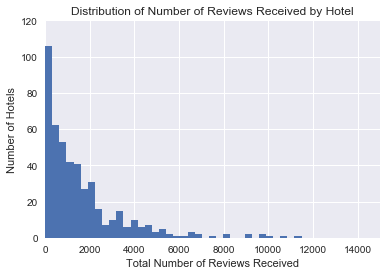

In [ ]:
df.n_reviews.hist(bins=50)
plt.title("Distribution of Number of Reviews Received by Hotel")
plt.ylabel("Number of Hotels");
plt.xlabel("Total Number of Reviews Received")
plt.xlim(0,15000)
plt.ylim(0,120)
plt.show()

In [ ]:
df.n_reviews.describe().T

count      467.000000
mean      1630.104925
std       1959.042842
min          0.000000
25%        384.000000
50%       1086.000000
75%       2072.000000
max      15964.000000
Name: n_reviews, dtype: float64

In [ ]:
df[df.rank_num.notnull()].n_reviews.describe()

count      449.000000
mean      1695.454343
std       1970.026364
min          1.000000
25%        488.000000
50%       1125.000000
75%       2138.000000
max      15964.000000
Name: n_reviews, dtype: float64

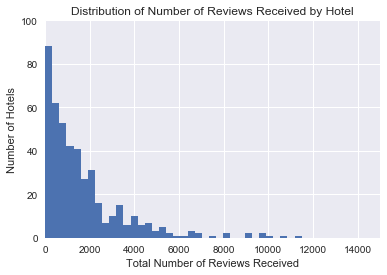

In [ ]:
df[df.rank_num.notnull()].n_reviews.hist(bins=50)
plt.title("Distribution of Number of Reviews Received by Hotel")
plt.ylabel("Number of Hotels");
plt.xlabel("Total Number of Reviews Received")
plt.xlim(0,15000)
plt.ylim(0,100)
plt.show()

In [ ]:
df.rank_num.describe()

count    449.000000
mean     225.000000
std      129.759393
min        1.000000
25%      113.000000
50%      225.000000
75%      337.000000
max      449.000000
Name: rank_num, dtype: float64

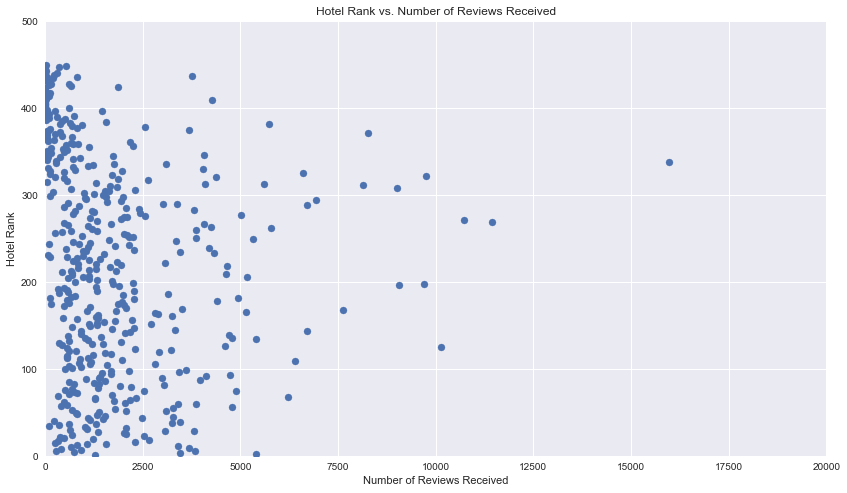

In [ ]:
plt.figure(figsize = (14,8))
plt.scatter(df.n_reviews, df.rank_num)
plt.title("Hotel Rank vs. Number of Reviews Received")
plt.ylabel("Hotel Rank");
plt.xlabel("Number of Reviews Received")
plt.xlim(0,20000)
plt.ylim(0,500)
plt.show()

In [ ]:
#total number of reviews across all hotels
df.n_reviews.sum()

761259

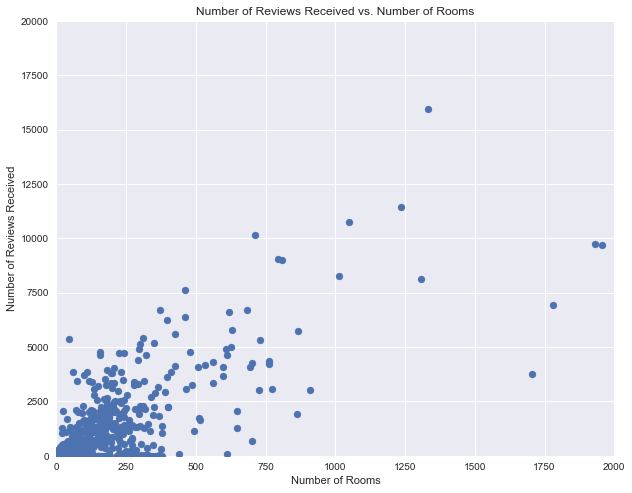

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(df.rooms_num, df.n_reviews)
plt.title("Number of Reviews Received vs. Number of Rooms")
plt.ylabel("Number of Reviews Received");
plt.xlabel("Number of Rooms")
plt.xlim(0,2000)
plt.ylim(0,20000)
plt.show()

In [ ]:
df_name_rank_reviews = df[['name','rank_num','n_reviews']]

In [ ]:
df_name_rank_reviews.to_csv('names_ranks_review_cts.csv')

### HOTEL CLASS

In [ ]:
df['hclass'] = df['hclass'].apply(lambda x: ''.join(c for c in x if c not in '{},"'))

In [ ]:
df.hclass.unique()

array([u'\n3.5 star \u2014 Loews Regency New York Hotel 3.5*',
       u'\n5 star \u2014 The Towers of the Waldorf Astoria - TEMPORARILY CLOSED 5*',
       u'\n5 star \u2014 Langham Place New York Fifth Avenue 5*',
       u'\n5 star \u2014 The Mark 5*',
       u'\n5 star \u2014 The St. Regis New York 5*',
       u'\n5 star \u2014 Smyth a Thompson Hotel 5*',
       u'\n4.5 star \u2014 Kimpton Ink48 Hotel 4.5*',
       u'\n5 star \u2014 Conrad New York 5*',
       u'\n5 star \u2014 Refinery Hotel 5*',
       u'\n4 star \u2014 citizenM New York Times Square 4*',
       u'\n4.5 star \u2014 Sanctuary Hotel New York 4.5*',
       u'\n4 star \u2014 Hotel Beacon 4*',
       u'\n3.5 star \u2014 Residence Inn New York Downtown Manhattan/World Trade Center Area 3.5*',
       u'\n3 star \u2014 Hotel Shocard at Times Square 3*',
       u'\n4 star \u2014 Gramercy Park Hotel 4*',
       u'\n4 star \u2014 Cassa Hotel Times Square 4*',
       u'\n3 star \u2014 Hotel Metro 3*',
       u'\n4 star \u2014 C

In [ ]:
df['hclass'] = df['hclass'].apply(lambda x: ''.join(c for c in x if c not in '\n'))

In [ ]:
df.hclass.unique()

array([u'3.5 star \u2014 Loews Regency New York Hotel 3.5*',
       u'5 star \u2014 The Towers of the Waldorf Astoria - TEMPORARILY CLOSED 5*',
       u'5 star \u2014 Langham Place New York Fifth Avenue 5*',
       u'5 star \u2014 The Mark 5*',
       u'5 star \u2014 The St. Regis New York 5*',
       u'5 star \u2014 Smyth a Thompson Hotel 5*',
       u'4.5 star \u2014 Kimpton Ink48 Hotel 4.5*',
       u'5 star \u2014 Conrad New York 5*',
       u'5 star \u2014 Refinery Hotel 5*',
       u'4 star \u2014 citizenM New York Times Square 4*',
       u'4.5 star \u2014 Sanctuary Hotel New York 4.5*',
       u'4 star \u2014 Hotel Beacon 4*',
       u'3.5 star \u2014 Residence Inn New York Downtown Manhattan/World Trade Center Area 3.5*',
       u'3 star \u2014 Hotel Shocard at Times Square 3*',
       u'4 star \u2014 Gramercy Park Hotel 4*',
       u'4 star \u2014 Cassa Hotel Times Square 4*',
       u'3 star \u2014 Hotel Metro 3*', u'4 star \u2014 Chambers Hotel 4*',
       u'5 star \u2014 T

In [ ]:
df['hclass_num'] = df['hclass'].apply(lambda x: float(x.split()[0]) if x != '' else None)

In [ ]:
df.hclass_num.unique()

array([ 3.5,  5. ,  4.5,  4. ,  3. ,  nan,  2. ,  2.5,  1.5,  1. ])

In [ ]:
df.hclass_num.value_counts(dropna=False)

 4.0    135
 3.0     88
 3.5     63
 4.5     50
NaN      41
 5.0     41
 2.5     27
 2.0     17
 1.0      3
 1.5      2
Name: hclass_num, dtype: int64

In [ ]:
df.columns

Index([          u'id',         u'name',    u'n_reviews',      u'st_addr',
               u'city',        u'state',       u'zip_cd', u'excellent_ct',
        u'verygood_ct',   u'average_ct',      u'poor_ct',  u'terrible_ct',
           u'families',      u'couples',         u'solo',     u'business',
            u'friends',       u'spring',       u'summer',         u'fall',
             u'winter',         u'rank',   u'highlights',       u'prange',
              u'rooms',       u'hclass',  u'description',     u'rank_num',
          u'rooms_num',   u'prange_low',  u'prange_high', u'prange_range',
         u'hclass_num'],
      dtype='object')

### NAME OF HOTEL

In [ ]:
df.name.head()

0            {"\n","\nLoews Regency New York Hotel\n"}
1    {"\n","\nThe Towers of the Waldorf Astoria - T...
2    {"\n","\nLangham Place, New York, Fifth Avenue...
3                                {"\n","\nThe Mark\n"}
4                  {"\n","\nThe St. Regis New York\n"}
Name: name, dtype: object

In [ ]:
df['name'] = df['name'].apply(lambda x: ''.join(c for c in x if c not in '{},"'))

In [ ]:
df.name.head()

0                   \n\nLoews Regency New York Hotel\n
1    \n\nThe Towers of the Waldorf Astoria - TEMPOR...
2            \n\nLangham Place New York Fifth Avenue\n
3                                       \n\nThe Mark\n
4                         \n\nThe St. Regis New York\n
Name: name, dtype: object

In [ ]:
df['name'] = df['name'].apply(lambda x: ''.join(c for c in x if c not in '\n'))

In [ ]:
df.name.unique()

array([u'Loews Regency New York Hotel',
       u'The Towers of the Waldorf Astoria - TEMPORARILY CLOSED',
       u'Langham Place New York Fifth Avenue', u'The Mark',
       u'The St. Regis New York', u'Smyth a Thompson Hotel',
       u'Kimpton Ink48 Hotel', u'Conrad New York', u'Refinery Hotel',
       u'citizenM New York Times Square', u'Sanctuary Hotel New York',
       u'Hotel Beacon',
       u'Residence Inn New York Downtown Manhattan/World Trade Center Area',
       u'Hotel Shocard at Times Square', u'Gramercy Park Hotel',
       u'Cassa Hotel Times Square', u'Hotel Metro', u'Chambers Hotel',
       u'Trump SoHo New York', u'Hyatt Union Square New York',
       u'W New York - Downtown', u'Da Vinci Hotel',
       u'The Jewel facing Rockefeller Center', u'The Blakely New York',
       u'SIXTY LES', u'The Premier New York Times Square',
       u'Marriott Vacation Club Pulse New York City',
       u'Renaissance New York Times Square Hotel', u'Hotel Mulberry',
       u'Radisson Martini

### ADDRESS FIELDS

In [ ]:
df['st_addr'] = df['st_addr'].apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [ ]:
df.st_addr.head()

0                        540 Park Avenue
1                          100 E 50th St
2                       400 Fifth Avenue
3          Madison Avenue at 77th Street
4    2 East 55th Street, at Fifth Avenue
Name: st_addr, dtype: object

In [ ]:
df['city'] = df['city'].apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [ ]:
df.city.head()

0    New York City
1    New York City
2    New York City
3    New York City
4    New York City
Name: city, dtype: object

In [ ]:
df['state'] = df['state'].apply(lambda x: ''.join(c for c in x if c not in '{}'))

In [ ]:
df.state.value_counts()

NY    467
Name: state, dtype: int64

In [ ]:
df['zip_cd'] = df['zip_cd'].apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [ ]:
#clean zip code value with NY in the text
df['zip_cd'] = df['zip_cd'].apply(lambda x: ''.join(c for c in x if c not in 'NY '))

In [ ]:
df.zip_cd.head()

0    10065-7366
1    10022-6844
2    10018-2753
3         10078
4         10022
Name: zip_cd, dtype: object

In [ ]:
df['zip_5'] = df.zip_cd.apply(lambda x: x[:5])

In [ ]:
df.zip_5.unique()

array([u'10065', u'10022', u'10018', u'10078', u'10007', u'10036',
       u'10282', u'10019', u'10023', u'10038', u'10010', u'10001',
       u'10013', u'10003', u'10006', u'10002', u'10017', u'10024',
       u'10014', u'10025', u'10012', u'10016', u'10011', u'12855',
       u'10004', u'10029', u'07001', '', u'10033', u'11354', u'10028',
       u'10005', u'11232', u'10128', u'10032', u'10021', u'10027'], dtype=object)

In [ ]:
df.loc[df['zip_5'] == '']

id       name  n_reviews          st_addr           city state zip_cd  \
83  82  Elk Hotel          4  360 42nd Street  New York City    NY          

   excellent_ct verygood_ct average_ct  ...  rooms hclass description  \
83          {0}         {1}        {0}  ...     50                      

   rank_num rooms_num prange_low prange_high prange_range hclass_num zip_5  
83    446.0      50.0        NaN         NaN          NaN        NaN        

[1 rows x 34 columns]

In [ ]:
df.loc[df['name'] == 'Elk Hotel','zip_cd'] = '10036'

In [ ]:
df.loc[df['name'] == 'Elk Hotel','zip_5'] = '10036'

In [ ]:
df.loc[df['name'] == 'Elk Hotel']

id       name  n_reviews          st_addr           city state zip_cd  \
83  82  Elk Hotel          4  360 42nd Street  New York City    NY  10036   

   excellent_ct verygood_ct average_ct  ...   rooms hclass description  \
83          {0}         {1}        {0}  ...      50                      

   rank_num rooms_num prange_low prange_high prange_range hclass_num  zip_5  
83    446.0      50.0        NaN         NaN          NaN        NaN  10036  

[1 rows x 34 columns]

In [ ]:
df.loc[~df['zip_5'].str.contains('10')]

id                                  name  n_reviews  \
59    57                    Beacon Light Motel          1   
78    77                           Hotel Henri          0   
95    96                        Flushing Motel          5   
131  132  Comfort Inn Sunset Park / Park Slope         35   

                 st_addr           city state      zip_cd excellent_ct  \
59               Route 9  New York City    NY       12855          {0}   
78   37 West 24th street  New York City    NY       07001           {}   
95        3450 Linden Pl  New York City    NY       11354          {0}   
131          353 38th St  New York City    NY  11232-2511          {6}   

    verygood_ct average_ct  ...   rooms  \
59          {0}        {1}  ...       9   
78           {}         {}  ...     118   
95          {1}        {0}  ...       4   
131        {10}        {3}  ...           

                                               hclass  \
59                                                      
78                            4 star — Hotel Henri 4*   
95                                                      
131  2 star — Comfort Inn Sunset Park / Park Slope 2*   

                                           description rank_num rooms_num  \
59                                                        421.0       9.0   
78   Hotel Henri is Manhattan's newest boutique exp...      NaN     118.0   
95                                                        432.0       4.0   
131                                                       392.0       NaN   

    prange_low prange_high prange_range hclass_num  zip_5  
59         NaN         NaN          NaN        NaN  12855  
78       183.0       416.0        233.0        4.0  07001  
95       105.0       151.0         46.0        NaN  11354  
131      178.0       183.0          5.0        2.0  11232  

[4 rows x 34 columns]

In [ ]:
#remove hotels above (Comfort Inn Sunset Park is permanently closed)
df = df[df['zip_5'].str.contains('10')]

In [ ]:
df.zip_5.unique()

array([u'10065', u'10022', u'10018', u'10078', u'10007', u'10036',
       u'10282', u'10019', u'10023', u'10038', u'10010', u'10001',
       u'10013', u'10003', u'10006', u'10002', u'10017', u'10024',
       u'10014', u'10025', u'10012', u'10016', u'10011', u'10004',
       u'10029', u'10033', u'10028', u'10005', u'10128', u'10032',
       u'10021', u'10027'], dtype=object)

In [ ]:
df['full_addr'] = df.st_addr + ", " + df.city + ", " + df.state + " " + df.zip_5

In [ ]:
df.full_addr.head(10)

0             540 Park Avenue, New York City, NY 10065
1               100 E 50th St, New York City, NY 10022
2            400 Fifth Avenue, New York City, NY 10018
3    Madison Avenue at 77th Street, New York City, ...
4    2 East 55th Street, at Fifth Avenue, New York ...
5            85 West Broadway, New York City, NY 10007
6     653 11th Avenue at 48th, New York City, NY 10036
7        102 North End Avenue, New York City, NY 10282
8         63 West 38th Street, New York City, NY 10018
9        218 West 50th Street, New York City, NY 10019
Name: full_addr, dtype: object

In [ ]:
df.loc[df['full_addr'].str.contains('at ')][['name','full_addr']]

name  \
3                               The Mark   
4                 The St. Regis New York   
6                    Kimpton Ink48 Hotel   
11                          Hotel Beacon   
42             W New York - Times Square   
90           Hotel Pennsylvania New York   
93                          Riff Chelsea   
148                  The Roosevelt Hotel   
183                     Wellington Hotel   
213  The Manhattan at Times Square Hotel   
235          Park Central Hotel New York   
382                            The Plaza   
424           Mandarin Oriental New York   
444               The Peninsula New York   
453      The Pierre A Taj Hotel New York   

                                             full_addr  
3    Madison Avenue at 77th Street, New York City, ...  
4    2 East 55th Street, at Fifth Avenue, New York ...  
6     653 11th Avenue at 48th, New York City, NY 10036  
11   2130 Broadway at 75th Street, New York City, N...  
42   1567 Broadway at 47th St, New York City, NY 10036  
90   401 Seventh Avenue at 33rd Street, New York Ci...  
93   300 W 30th St at 8th Ave, New York City, NY 10001  
148  45 East 45th Street at Madison Avenue, New Yor...  
183  871 7th Avenue at W 55th St, New York City, NY...  
213  790 7th Avenue at 51st Street, New York City, ...  
235  870 Seventh Avenue at 56th Street, New York Ci...  
382  Fifth Avenue at Central Park South, New York C...  
424  80 Columbus Circle at 60th Street, New York Ci...  
444  700 Fifth Avenue at 55th Street, New York City...  
453  2 East 61st Street at Fifth Avenue, New York C...

In [ ]:
df.loc[df['name'] == 'The Mark','full_addr'] = '25 E 77th St, New York, NY 10075'

In [ ]:
df.loc[df['name'] == 'The St. Regis New York','full_addr'].str.replace(', at Fifth Avenue','')

4    2 East 55th Street, New York City, NY 10022
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The St. Regis New York','full_addr'] = df.loc[df['name'] == 'The St. Regis New York','full_addr'].str.replace(', at Fifth Avenue','')

In [ ]:
df.ix[4]['full_addr']

u'2 East 55th Street, New York City, NY 10022'

In [ ]:
df.loc[df['name'] == 'Kimpton Ink48 Hotel','full_addr']

6    653 11th Avenue at 48th, New York City, NY 10036
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Kimpton Ink48 Hotel','full_addr'] = df.loc[df['name'] == 'Kimpton Ink48 Hotel','full_addr'].str.replace(' at 48th','')

In [ ]:
df.ix[6]['full_addr']

u'653 11th Avenue, New York City, NY 10036'

In [ ]:
df.loc[df['name'] == 'Hotel Beacon','full_addr']

11    2130 Broadway at 75th Street, New York City, N...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Hotel Beacon','full_addr'] = df.loc[df['name'] == 'Hotel Beacon','full_addr'].str.replace(' at 75th Street','')

In [ ]:
df.ix[11]['full_addr']

u'2130 Broadway, New York City, NY 10023'

In [ ]:
df.loc[df['name'] == 'W New York - Times Square','full_addr']

42    1567 Broadway at 47th St, New York City, NY 10036
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'W New York - Times Square','full_addr'] = df.loc[df['name'] == 'W New York - Times Square','full_addr'].str.replace(' at 47th St','')

In [ ]:
df.ix[42]['full_addr']

u'1567 Broadway, New York City, NY 10036'

In [ ]:
df.loc[df['name'] == 'Hotel Pennsylvania New York','full_addr']

90    401 Seventh Avenue at 33rd Street, New York Ci...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Hotel Pennsylvania New York','full_addr'] = df.loc[df['name'] == 'Hotel Pennsylvania New York','full_addr'].str.replace(' at 33rd Street','')

In [ ]:
df.ix[90]['full_addr']

u'401 Seventh Avenue, New York City, NY 10001'

In [ ]:
df.loc[df['name'] == 'Riff Chelsea','full_addr']

93    300 W 30th St at 8th Ave, New York City, NY 10001
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Riff Chelsea','full_addr'] = df.loc[df['name'] == 'Riff Chelsea','full_addr'].str.replace(' at 8th Ave','')

In [ ]:
df.ix[93]['full_addr']

u'300 W 30th St, New York City, NY 10001'

In [ ]:
df.loc[df['name'] == 'The Roosevelt Hotel','full_addr']

148    45 East 45th Street at Madison Avenue, New Yor...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The Roosevelt Hotel','full_addr'] = df.loc[df['name'] == 'The Roosevelt Hotel','full_addr'].str.replace(' at Madison Avenue','')

In [ ]:
df.ix[148]['full_addr']

u'45 East 45th Street, New York City, NY 10017'

In [ ]:
df.loc[df['name'] == 'Wellington Hotel','full_addr']

183    871 7th Avenue at W 55th St, New York City, NY...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Wellington Hotel','full_addr'] = df.loc[df['name'] == 'Wellington Hotel','full_addr'].str.replace(' at W 55th St','')

In [ ]:
df.ix[183]['full_addr']

u'871 7th Avenue, New York City, NY 10019'

In [ ]:
df.loc[df['name'] == 'The Manhattan at Times Square Hotel','full_addr']

213    790 7th Avenue at 51st Street, New York City, ...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The Manhattan at Times Square Hotel','full_addr'] = df.loc[df['name'] == 'The Manhattan at Times Square Hotel','full_addr'].str.replace(' at 51st Street','')

In [ ]:
df.ix[213]['full_addr']

u'790 7th Avenue, New York City, NY 10019'

In [ ]:
df.loc[df['name'] == 'Park Central Hotel New York','full_addr']

235    870 Seventh Avenue at 56th Street, New York Ci...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Park Central Hotel New York','full_addr'] = df.loc[df['name'] == 'Park Central Hotel New York','full_addr'].str.replace(' at 56th Street','')

In [ ]:
df.ix[235]['full_addr']

u'870 Seventh Avenue, New York City, NY 10019'

In [ ]:
df.loc[df['name'] == 'The Plaza','full_addr']

382    Fifth Avenue at Central Park South, New York C...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The Plaza','full_addr'] = '768 5th Ave, New York, NY 10019'

In [ ]:
df.ix[382]['full_addr']

'768 5th Ave, New York, NY 10019'

In [ ]:
df.loc[df['name'] == 'Mandarin Oriental New York','full_addr']

424    80 Columbus Circle at 60th Street, New York Ci...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'Mandarin Oriental New York','full_addr'] = df.loc[df['name'] == 'Mandarin Oriental New York','full_addr'].str.replace(' at 60th Street','')

In [ ]:
df.ix[424]['full_addr']

u'80 Columbus Circle, New York City, NY 10023'

In [ ]:
df.loc[df['name'] == 'The Peninsula New York','full_addr']

444    700 Fifth Avenue at 55th Street, New York City...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The Peninsula New York','full_addr'] = df.loc[df['name'] == 'The Peninsula New York','full_addr'].str.replace(' at 55th Street','')

In [ ]:
df.ix[444]['full_addr']

u'700 Fifth Avenue, New York City, NY 10019'

In [ ]:
df.loc[df['name'] == 'The Pierre A Taj Hotel New York','full_addr']

453    2 East 61st Street at Fifth Avenue, New York C...
Name: full_addr, dtype: object

In [ ]:
df.loc[df['name'] == 'The Pierre A Taj Hotel New York','full_addr'] = df.loc[df['name'] == 'The Pierre A Taj Hotel New York','full_addr'].str.replace(' at Fifth Avenue','')

In [ ]:
df.ix[453]['full_addr']

u'2 East 61st Street, New York City, NY 10065'

In [ ]:
df.full_addr.isnull().sum()

0

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(463, 36)

### GEOCODING

In [ ]:
import geocoder

In [ ]:
def long_lat(address):
    g = geocoder.google(address)
    longit = g.lng
    latit = g.lat
    return longit, latit

In [ ]:
df['longitude'], df['latitude'] = zip(*df['full_addr'].apply(lambda x: long_lat(x)))

In [ ]:
df[['longitude','latitude']].head(10)

longitude   latitude
0 -73.969147  40.764497
1 -73.973407  40.756802
2 -73.983811  40.750116
3 -73.963399  40.775271
4 -73.974613  40.761398
5 -74.009140  40.715201
6 -73.995987  40.764569
7 -74.015222  40.715001
8 -73.985372  40.752208
9 -73.984968  40.761561

In [ ]:
df[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [ ]:
df.full_addr.isnull().sum()

0

In [ ]:
def rank_group(rank_val):
    if rank_val <= 100:
        rank_grp = '1-100'
    elif rank_val <= 200:
        rank_grp = '101-200'
    elif rank_val <= 300:
        rank_grp = '201-300'
    elif rank_val <= 400:
        rank_grp = '301-400'
    else:
        rank_grp = '401-last'
    return rank_grp    

In [ ]:
df['rank_group'] = df.rank_num.apply(lambda x: rank_group(x))

In [ ]:
df.rank_group.value_counts()

201-300     100
1-100       100
101-200     100
301-400      99
401-last     64
Name: rank_group, dtype: int64

In [ ]:
#remove hotels without a ranking
df_geo = df[df.rank_num.notnull()].reset_index()

In [ ]:
df_geo.rank_group.value_counts()

201-300     100
1-100       100
101-200     100
301-400      99
401-last     47
Name: rank_group, dtype: int64

In [ ]:
df_geo = df_geo[['name','longitude','latitude','rank_group']]

In [ ]:
df_geo.to_csv('lat_lon.csv')

### REVIEW COUNTS BY GROUP

In [ ]:
df['excellent_ct'] = df.excellent_ct.apply(lambda x: ''.join(c for c in x if c not in '{}",') if x != '' else None)

In [ ]:
df['excellent_ct'] = df.excellent_ct.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df.excellent_ct.head()

0     952.0
1    1381.0
2    1417.0
3     464.0
4     448.0
Name: excellent_ct, dtype: float64

In [ ]:
df['verygood_ct'] = df.verygood_ct.apply(lambda x: ''.join(c for c in x if c not in '{}",') if x != '' else None)

In [ ]:
df['verygood_ct'] = df.verygood_ct.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['average_ct'] = df.average_ct.apply(lambda x: ''.join(c for c in x if c not in '{}",') if x != '' else None)

In [ ]:
df['average_ct'] = df.average_ct.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['poor_ct'] = df.poor_ct.apply(lambda x: ''.join(c for c in x if c not in '{}",') if x != '' else None)

In [ ]:
df['poor_ct'] = df.poor_ct.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['terrible_ct'] = df.terrible_ct.apply(lambda x: ''.join(c for c in x if c not in '{}",') if x != '' else None)

In [ ]:
df['terrible_ct'] = df.terrible_ct.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['families'] = df.families.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['families'] = df.families.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['couples'] = df.couples.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['couples'] = df.couples.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['solo'] = df.solo.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['solo'] = df.solo.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['business'] = df.business.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['business'] = df.business.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['friends'] = df.friends.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['friends'] = df.friends.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['spring'] = df.spring.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['spring'] = df.spring.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['summer'] = df.summer.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['summer'] = df.summer.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['fall'] = df.fall.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['fall'] = df.fall.apply(lambda x: float(x) if x != '' else 0)

In [ ]:
df['winter'] = df.winter.apply(lambda x: ''.join(c for c in x if c not in '{}()",') if x != '' else None)

In [ ]:
df['winter'] = df.winter.apply(lambda x: float(x) if x != '' else 0)

### HIGHLIGHTS

In [ ]:
df['highlights'] = df['highlights'].apply(lambda x: ''.join(c for c in x if c not in '{}"'))

In [ ]:
df['highlights'] = df['highlights'].apply(lambda x: x.replace("\n,",''))

In [ ]:
df['highlights'] = df['highlights'].apply(lambda x: x.split('\n'))

In [ ]:
#remove all empty string elements from the list
df['highlights'] = df['highlights'].apply(lambda x: filter(lambda v: v != '', x))

In [ ]:
list_of_highlights = df.highlights.tolist()
print len(list_of_highlights)

463


In [ ]:
#check which unique amenities exist in highlights column
unique_list = []
for list in list_of_highlights:
    for item in list:
        if item not in unique_list:
            unique_list.append(item)
print unique_list

[u'Free High Speed Internet ( WiFi )', u'Room Service', u'Restaurant', u'Bar/Lounge', u'Fitness Center with Gym / Workout Room', u'Spa', u'Breakfast included', u'Pool', u'Free Internet', u'Free Parking']


In [ ]:
#function that takes list of amenities at individual hotel and reorders values and adds empty string
def new_list(orig_list):
    #amenities order in new list: wifi, room service, restaurant, bar/lounge, gym, spa, breakfast, pool, internet, parking
    new_list = []
    for item in unique_list:
        if item in orig_list:
            new_list.append(item)
        else:
            new_list.append('')
    return new_list

In [ ]:
df['highlights'] = df.highlights.apply(lambda x: new_list(x))

In [ ]:
df.highlights[10]

[u'Free High Speed Internet ( WiFi )',
 '',
 u'Restaurant',
 u'Bar/Lounge',
 '',
 '',
 u'Breakfast included',
 '',
 '',
 '']

In [ ]:
highlights_df = pd.DataFrame()

In [ ]:
highlights_df[['amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge',
              'amen_gym','amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking']] = pd.DataFrame([x for x in df.highlights])

In [ ]:
highlights_df = highlights_df[['amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge',
              'amen_gym','amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking']]

In [ ]:
highlights_df.shape

(463, 10)

In [ ]:
highlights_df = highlights_df.applymap(lambda x: 1 if x != '' else 0)

In [ ]:
highlights_df.amen_restaurant.value_counts()

1    242
0    221
Name: amen_restaurant, dtype: int64

In [ ]:
highlights_df.index.unique().tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
df.index.unique().tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
df.shape

(463, 39)

In [ ]:
df = pd.concat([df, highlights_df], axis=1)

### OTHER HOUSEKEEPING/CLEANING + DATA EXPLORATION

In [ ]:
df.columns

Index([            u'index',                u'id',              u'name',
               u'n_reviews',           u'st_addr',              u'city',
                   u'state',            u'zip_cd',      u'excellent_ct',
             u'verygood_ct',        u'average_ct',           u'poor_ct',
             u'terrible_ct',          u'families',           u'couples',
                    u'solo',          u'business',           u'friends',
                  u'spring',            u'summer',              u'fall',
                  u'winter',              u'rank',        u'highlights',
                  u'prange',             u'rooms',            u'hclass',
             u'description',          u'rank_num',         u'rooms_num',
              u'prange_low',       u'prange_high',      u'prange_range',
              u'hclass_num',             u'zip_5',         u'full_addr',
               u'longitude',          u'latitude',        u'rank_group',
               u'amen_wifi', u'amen_room_service', 

In [ ]:
df.shape

(463, 49)

In [ ]:
df.rank_num.isnull().sum()

17

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
#remove hotels without a ranking
df = df[df.rank_num.notnull()].reset_index()

In [ ]:
df.shape

(446, 49)

In [ ]:
df.drop(['index','id','rank','highlights','prange','hclass','rooms'], axis=1, inplace=True)

In [ ]:
df.shape

(446, 42)

In [ ]:
df.dtypes

name                  object
n_reviews              int64
st_addr               object
city                  object
state                 object
zip_cd                object
excellent_ct         float64
verygood_ct          float64
average_ct           float64
poor_ct              float64
terrible_ct          float64
families             float64
couples              float64
solo                 float64
business             float64
friends              float64
spring               float64
summer               float64
fall                 float64
winter               float64
description           object
rank_num             float64
rooms_num            float64
prange_low           float64
prange_high          float64
prange_range         float64
hclass_num           float64
zip_5                 object
full_addr             object
longitude            float64
latitude             float64
rank_group            object
amen_wifi              int64
amen_room_service      int64
amen_restauran

In [ ]:
df.isnull().sum()

name                  0
n_reviews             0
st_addr               0
city                  0
state                 0
zip_cd                0
excellent_ct          0
verygood_ct           0
average_ct            0
poor_ct               0
terrible_ct           0
families              0
couples               0
solo                  0
business              0
friends               0
spring                0
summer                0
fall                  0
winter                0
description           0
rank_num              0
rooms_num             6
prange_low           22
prange_high          22
prange_range         22
hclass_num           28
zip_5                 0
full_addr             0
longitude             0
latitude              0
rank_group            0
amen_wifi             0
amen_room_service     0
amen_restaurant       0
amen_bar_lounge       0
amen_gym              0
amen_spa              0
amen_breakfast        0
amen_pool             0
amen_internet         0
amen_parking    

In [ ]:
df.head()

name  n_reviews  \
0                       Loews Regency New York Hotel       1355   
1  The Towers of the Waldorf Astoria - TEMPORARIL...       2016   
2                Langham Place New York Fifth Avenue       2065   
3                                           The Mark        687   
4                             The St. Regis New York        633   

                               st_addr           city state      zip_cd  \
0                      540 Park Avenue  New York City    NY  10065-7366   
1                        100 E 50th St  New York City    NY  10022-6844   
2                     400 Fifth Avenue  New York City    NY  10018-2753   
3        Madison Avenue at 77th Street  New York City    NY       10078   
4  2 East 55th Street, at Fifth Avenue  New York City    NY       10022   

   excellent_ct  verygood_ct  average_ct  poor_ct      ...       amen_wifi  \
0         952.0        162.0        62.0     27.0      ...               1   
1        1381.0        245.0       107.0     69.0      ...               1   
2        1417.0        203.0        72.0     33.0      ...               1   
3         464.0         87.0        24.0      8.0      ...               1   
4         448.0         70.0        34.0     12.0      ...               1   

   amen_room_service  amen_restaurant  amen_bar_lounge  amen_gym  amen_spa  \
0                  1                1                1         1         1   
1                  1                1                1         1         1   
2                  1                1                0         1         1   
3                  1                1                1         1         0   
4                  1                1                1         1         0   

   amen_breakfast  amen_pool  amen_internet  amen_parking  
0               0          0              0             0  
1               1          0              0             0  
2               0          0              0             0  
3               0          0              0             0  
4               0          0              0             0  

[5 rows x 42 columns]

In [ ]:
df.describe().T

count         mean          std         min         25%  \
n_reviews          446.0  1706.766816  1971.793651    1.000000  490.000000   
excellent_ct       446.0   649.430493   758.438564    0.000000  136.000000   
verygood_ct        446.0   426.744395   514.973168    0.000000  103.500000   
average_ct         446.0   162.188341   251.393698    0.000000   29.000000   
poor_ct            446.0    67.883408   123.088932    0.000000   10.250000   
terrible_ct        446.0    52.934978    97.800452    0.000000    8.000000   
families           446.0   322.632287   440.795674    0.000000   62.000000   
couples            446.0   453.069507   522.289052    0.000000  112.250000   
solo               446.0    85.143498    92.791040    0.000000   28.000000   
business           446.0   230.208520   287.663535    0.000000   46.500000   
friends            446.0   156.656951   202.661596    0.000000   39.250000   
spring             446.0   328.208520   380.405572    0.000000   83.750000   
summer             446.0   344.726457   388.561781    0.000000   89.500000   
fall               446.0   346.053812   393.191987    0.000000   99.250000   
winter             446.0   340.192825   400.395208    0.000000   85.000000   
rank_num           446.0   223.721973   129.244282    1.000000  112.250000   
rooms_num          440.0   227.811364   250.606696    4.000000   89.000000   
prange_low         424.0   247.099057   116.800529   58.000000  187.750000   
prange_high        424.0   540.252358   541.776637  109.000000  389.500000   
prange_range       424.0   293.153302   481.486324    0.000000  197.000000   
hclass_num         418.0     3.671053     0.806924    1.000000    3.000000   
longitude          446.0   -73.986208     0.012570  -74.017400  -73.993046   
latitude           446.0    40.749608     0.021061   40.703121   40.742868   
amen_wifi          446.0     0.798206     0.401790    0.000000    1.000000   
amen_room_service  446.0     0.484305     0.500315    0.000000    0.000000   
amen_restaurant    446.0     0.526906     0.499836    0.000000    0.000000   
amen_bar_lounge    446.0     0.591928     0.492028    0.000000    0.000000   
amen_gym           446.0     0.677130     0.468099    0.000000    0.000000   
amen_spa           446.0     0.100897     0.301530    0.000000    0.000000   
amen_breakfast     446.0     0.213004     0.409891    0.000000    0.000000   
amen_pool          446.0     0.062780     0.242840    0.000000    0.000000   
amen_internet      446.0     0.071749     0.258361    0.000000    0.000000   
amen_parking       446.0     0.002242     0.047351    0.000000    0.000000   

                           50%          75%           max  
n_reviews          1128.000000  2144.000000  15964.000000  
excellent_ct        400.500000   824.500000   4265.000000  
verygood_ct         265.500000   579.750000   3765.000000  
average_ct           88.000000   184.500000   2206.000000  
poor_ct              33.000000    69.750000   1135.000000  
terrible_ct          24.000000    51.750000    927.000000  
families            179.000000   407.750000   3366.000000  
couples             284.500000   582.000000   3494.000000  
solo                 57.500000   115.000000    757.000000  
business            137.500000   307.500000   2343.000000  
friends              94.000000   198.000000   2239.000000  
spring              209.500000   420.000000   2992.000000  
summer              225.500000   458.750000   2622.000000  
fall                230.000000   440.250000   2876.000000  
winter              217.500000   428.500000   3033.000000  
rank_num            223.500000   334.750000    449.000000  
rooms_num           160.000000   263.500000   1957.000000  
prange_low          218.000000   270.000000    869.000000  
prange_high         461.000000   560.750000  10000.000000  
prange_range        240.000000   300.250000   9281.000000  
hclass_num            4.000000     4.000000      5.000000  
longitude           -73.985806   -73.978862   

In [ ]:
df_sub = df[['excellent_ct','verygood_ct','average_ct','poor_ct','terrible_ct']]
df_sub.rename(columns={'excellent_ct':"# Excellent Reviews",'verygood_ct':"# Very Good Reviews",'average_ct':"# Average Reviews",'poor_ct':'# Poor Reviews','terrible_ct':"# Terrible Reviews"},inplace=True)

/Users/sashakapralov/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [ ]:
df_sub.describe()

# Excellent Reviews  # Very Good Reviews  # Average Reviews  \
count           446.000000           446.000000         446.000000   
mean            649.430493           426.744395         162.188341   
std             758.438564           514.973168         251.393698   
min               0.000000             0.000000           0.000000   
25%             136.000000           103.500000          29.000000   
50%             400.500000           265.500000          88.000000   
75%             824.500000           579.750000         184.500000   
max            4265.000000          3765.000000        2206.000000   

       # Poor Reviews  # Terrible Reviews  
count      446.000000          446.000000  
mean        67.883408           52.934978  
std        123.088932           97.800452  
min          0.000000            0.000000  
25%         10.250000            8.000000  
50%         33.000000           24.000000  
75%         69.750000           51.750000  
max       1135.000000          927.000000

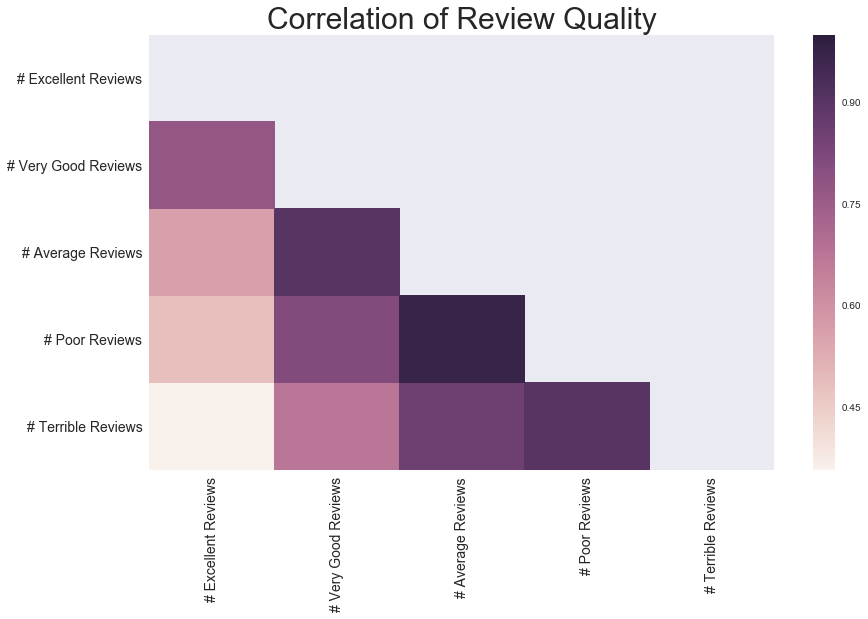

In [ ]:
corrs = df_sub.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(14,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

plt.title("Correlation of Review Quality", fontsize= 30)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

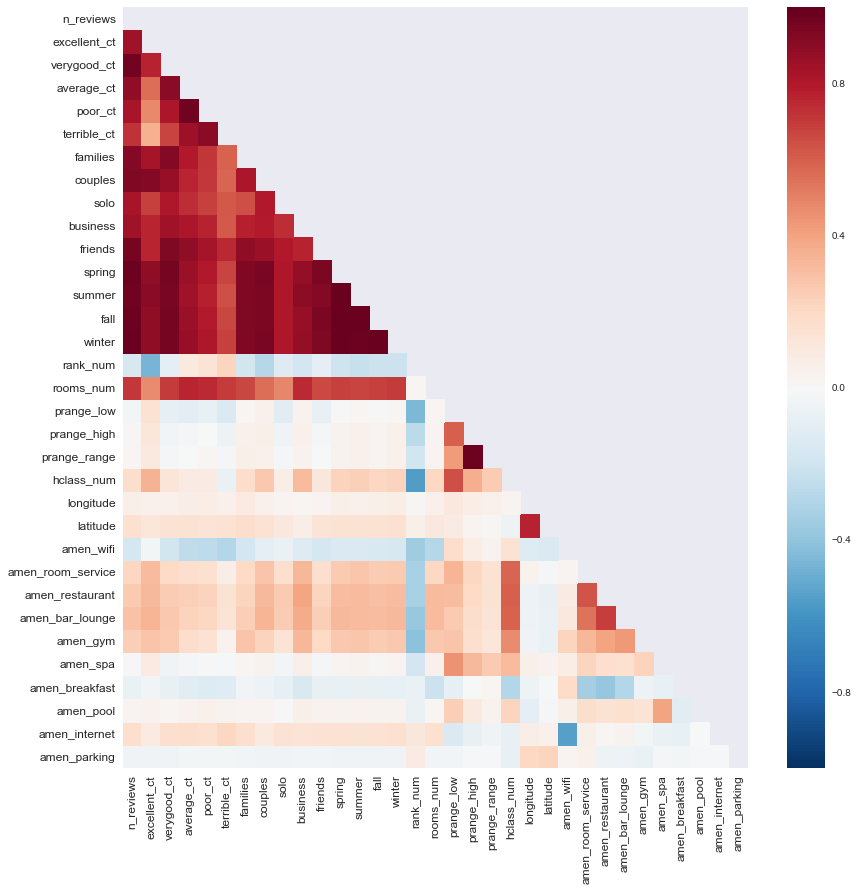

In [ ]:
corrs = df.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(14,14))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
df.corr()

n_reviews  excellent_ct  verygood_ct  average_ct   poor_ct  \
n_reviews           1.000000      0.848525     0.962677    0.885185  0.823423   
excellent_ct        0.848525      1.000000     0.772737    0.561950  0.484349   
verygood_ct         0.962677      0.772737     1.000000    0.902142  0.815889   
average_ct          0.885185      0.561950     0.902142    1.000000  0.974662   
poor_ct             0.823423      0.484349     0.815889    0.974662  1.000000   
terrible_ct         0.725376      0.357194     0.675321    0.859367  0.904660   
families            0.915686      0.832851     0.915767    0.797224  0.718285   
couples             0.934479      0.916443     0.870994    0.762286  0.705515   
solo                0.823449      0.684492     0.809323    0.737356  0.687373   
business            0.845903      0.759651     0.848481    0.817052  0.771592   
friends             0.955051      0.762475     0.935373    0.886254  0.828994   
spring              0.983436      0.888717     0.957170    0.866306  0.803564   
summer              0.974165      0.901892     0.952660    0.845394  0.777673   
fall                0.983876      0.889399     0.960579    0.862410  0.793270   
winter              0.985659      0.884081     0.954910    0.871801  0.810043   
rank_num           -0.169490     -0.462336    -0.095847    0.096597  0.134831   
rooms_num           0.710305      0.470614     0.701162    0.762630  0.742507   
prange_low         -0.026630      0.155248    -0.093286   -0.106819 -0.085696   
prange_high         0.013936      0.119233    -0.035980   -0.023170 -0.000321   
prange_range        0.022141      0.096502    -0.017855   -0.000158  0.020427   
hclass_num          0.174987      0.350239     0.128137    0.080170  0.083783   
longitude           0.058280      0.047598     0.048841    0.064711  0.074612   
latitude            0.163031      0.122228     0.146975    0.142579  0.138705   
amen_wifi          -0.173621     -0.031040    -0.189725   -0.254360 -0.259384   
amen_room_service   0.218039      0.319504     0.197361    0.169613  0.159871   
amen_restaurant     0.265306      0.323804     0.255413    0.234558  0.228115   
amen_bar_lounge     0.295969      0.342043     0.273394    0.229879  0.216610   
amen_gym            0.242831      0.284127     0.258329    0.186172  0.155664   
amen_spa            0.002251      0.092638    -0.046172   -0.020529  0.005827   
amen_breakfast     -0.065492     -0.032918    -0.076084   -0.116649 -0.133083   
amen_pool           0.027509      0.040312     0.020021    0.042579  0.048361   
amen_internet       0.165473      0.088192     0.167973    0.172750  0.159185   
amen_parking       -0.040886     -0.040512    -0.039327   -0.030429 -0.025402   

                   terrible_ct  families   couples      solo  business  \
n_reviews             0.725376  0.915686  0.934479  0.823449  0.845903   
excellent_ct          0.357194  0.832851  0.916443  0.684492  0.759651   
verygood_ct           0.675321  0.915767  0.870994  0.809323  0.848481   
average_ct            0.859367  0.797224  0.762286  0.737356  0.817052   
poor_ct               0.904660  0.718285  0.705515  0.687373  0.771592   
terrible_ct           1.000000  0.588858  0.582010  0.621455  0.611863   
families              0.588858  1.000000  0.814466  0.647194  0.779094   
couples               0.582010  0.814466  1.000000  0.800911  0.795542   
solo                  0.621455  0.647194  0.800911  1.000000  0.737673   
business              0.611863  0.779094  0.795542  0.737673  1.000000   
friends               0.756712  0.887089  0.860772  0.797481  0.771432   
spring                0.676163  0.927200  0.949805  0.810482  0.875842   
summer                0.645607  0.923134  0.944177  0.811408  0.891001   
fall                  0.669354  0.934090  0.945249  0.812157  0.869229   
winter                0.680869  0.926582  0.946948  0.808577  0.879511   
rank_num              0.219769 -0.192917 -0.287290 -0.127930 -0.184751   
rooms_

In [ ]:
rank_corr_df = df.corr()['rank_num']

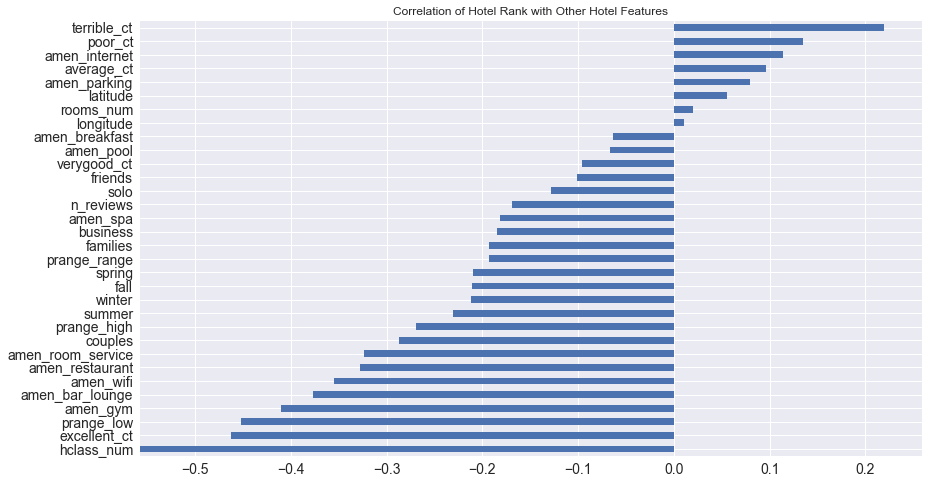

In [ ]:
title = "Correlation of Hotel Rank with Other Hotel Features"
rank_corr_df[rank_corr_df.index != 'rank_num'].sort_values().plot(kind="barh", title=title, figsize=(14,8), fontsize=14)
plt.show()

In [ ]:
df.columns

Index([             u'name',         u'n_reviews',           u'st_addr',
                    u'city',             u'state',            u'zip_cd',
            u'excellent_ct',       u'verygood_ct',        u'average_ct',
                 u'poor_ct',       u'terrible_ct',          u'families',
                 u'couples',              u'solo',          u'business',
                 u'friends',            u'spring',            u'summer',
                    u'fall',            u'winter',       u'description',
                u'rank_num',         u'rooms_num',        u'prange_low',
             u'prange_high',      u'prange_range',        u'hclass_num',
                   u'zip_5',         u'full_addr',         u'longitude',
                u'latitude',        u'rank_group',         u'amen_wifi',
       u'amen_room_service',   u'amen_restaurant',   u'amen_bar_lounge',
                u'amen_gym',          u'amen_spa',    u'amen_breakfast',
               u'amen_pool',     u'amen_internet', 

In [ ]:
continuous = df[['n_reviews','excellent_ct','verygood_ct','average_ct','poor_ct','terrible_ct','families',
                'couples','solo','business','friends','spring','summer','fall','winter','rooms_num',
                'prange_low','prange_high','prange_range','rank_num']]

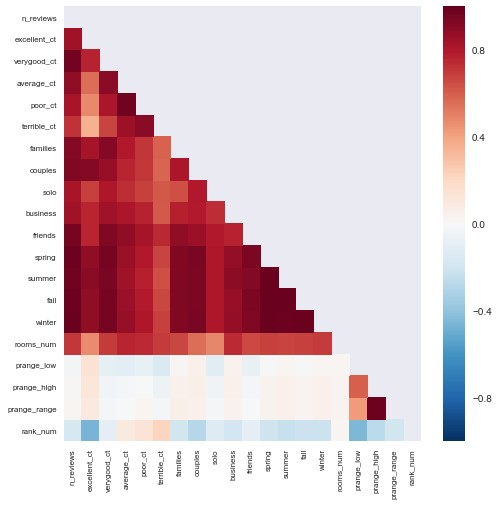

In [ ]:
corrs = continuous.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
rank_corr_cont_df = continuous.corr()['rank_num']

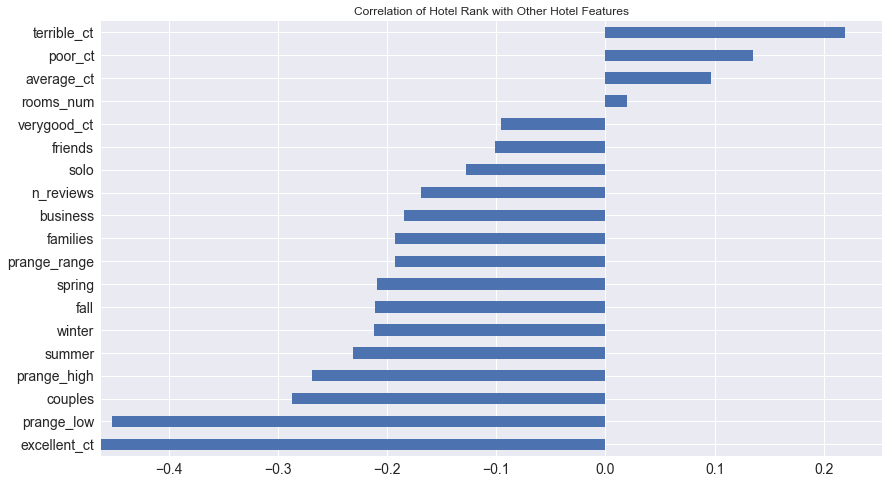

In [ ]:
title = "Correlation of Hotel Rank with Other Hotel Features"
rank_corr_cont_df[rank_corr_cont_df.index != 'rank_num'].sort_values().plot(kind="barh", title=title, figsize=(14,8), fontsize=14)
plt.show()

In [ ]:
categorical = df[['zip_5','hclass_num',
                 'amen_wifi','amen_room_service','amen_restaurant','amen_bar_lounge',
              'amen_gym','amen_spa','amen_breakfast','amen_pool','amen_internet','amen_parking']]

In [ ]:
qual_cols = categorical.columns.tolist()

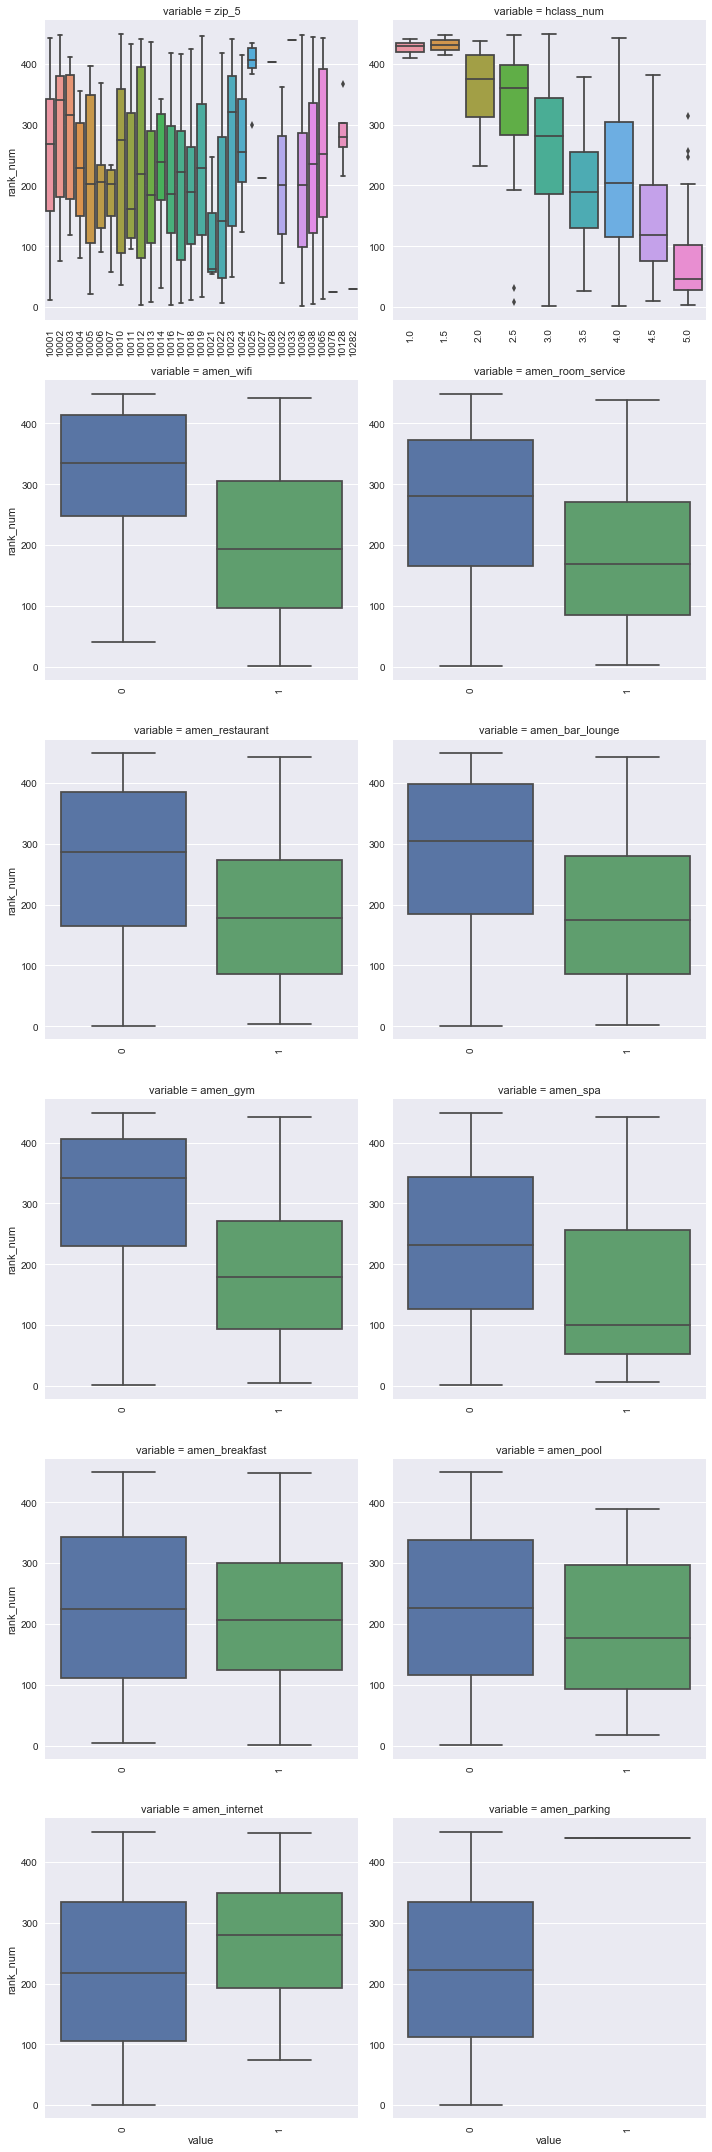

In [ ]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['rank_num'], value_vars=qual_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "rank_num")

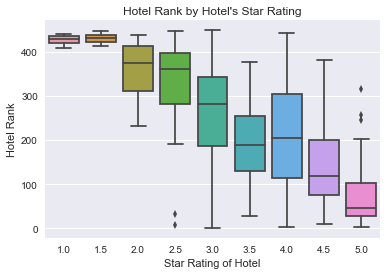

In [ ]:
sns.boxplot(x=df.hclass_num, y=df.rank_num)
plt.title("Hotel Rank by Hotel's Star Rating")
plt.ylabel("Hotel Rank");
plt.xlabel("Star Rating of Hotel")
plt.show()

In [ ]:
df.columns

Index([             u'name',         u'n_reviews',           u'st_addr',
                    u'city',             u'state',            u'zip_cd',
            u'excellent_ct',       u'verygood_ct',        u'average_ct',
                 u'poor_ct',       u'terrible_ct',          u'families',
                 u'couples',              u'solo',          u'business',
                 u'friends',            u'spring',            u'summer',
                    u'fall',            u'winter',       u'description',
                u'rank_num',         u'rooms_num',        u'prange_low',
             u'prange_high',      u'prange_range',        u'hclass_num',
                   u'zip_5',         u'full_addr',         u'longitude',
                u'latitude',        u'rank_group',         u'amen_wifi',
       u'amen_room_service',   u'amen_restaurant',   u'amen_bar_lounge',
                u'amen_gym',          u'amen_spa',    u'amen_breakfast',
               u'amen_pool',     u'amen_internet', 

In [ ]:
df[(df.hclass_num != 1.0) & (df.hclass_num != 1.5)].groupby('hclass_num')['rooms_num'].describe()

hclass_num       
2.0         count      16.000000
            mean       86.750000
            std        85.692084
            min        25.000000
            25%        40.750000
            50%        55.000000
            75%        85.500000
            max       375.000000
2.5         count      26.000000
            mean      148.615385
            std       324.605493
            min         4.000000
            25%        46.250000
            50%        75.500000
            75%       114.000000
            max      1705.000000
3.0         count      87.000000
            mean      135.367816
            std       102.023152
            min        15.000000
            25%        70.000000
            50%       124.000000
            75%       180.500000
            max       618.000000
3.5         count      59.000000
            mean      223.949153
            std       143.690211
            min        27.000000
            25%       126.500000
            50%       211

In [ ]:
df[(df.hclass_num != 1.0) & (df.hclass_num != 1.5)].groupby('hclass_num')['n_reviews'].describe()

hclass_num       
2.0         count       16.000000
            mean       592.562500
            std        465.582498
            min          2.000000
            25%        233.750000
            50%        624.000000
            75%        724.500000
            max       1505.000000
2.5         count       26.000000
            mean       915.538462
            std        935.694960
            min          8.000000
            25%        340.000000
            50%        577.000000
            75%       1233.250000
            max       3770.000000
3.0         count       87.000000
            mean      1364.574713
            std       1251.973091
            min          1.000000
            25%        526.500000
            50%       1089.000000
            75%       1814.500000
            max       6614.000000
3.5         count       61.000000
            mean      1810.475410
            std       1714.736565
            min         58.000000
            25%        776.000

hclass_num
2.0    Axes(0.125,0.125;0.775x0.755)
2.5    Axes(0.125,0.125;0.775x0.755)
3.0    Axes(0.125,0.125;0.775x0.755)
3.5    Axes(0.125,0.125;0.775x0.755)
4.0    Axes(0.125,0.125;0.775x0.755)
4.5    Axes(0.125,0.125;0.775x0.755)
5.0    Axes(0.125,0.125;0.775x0.755)
Name: prange_low, dtype: object

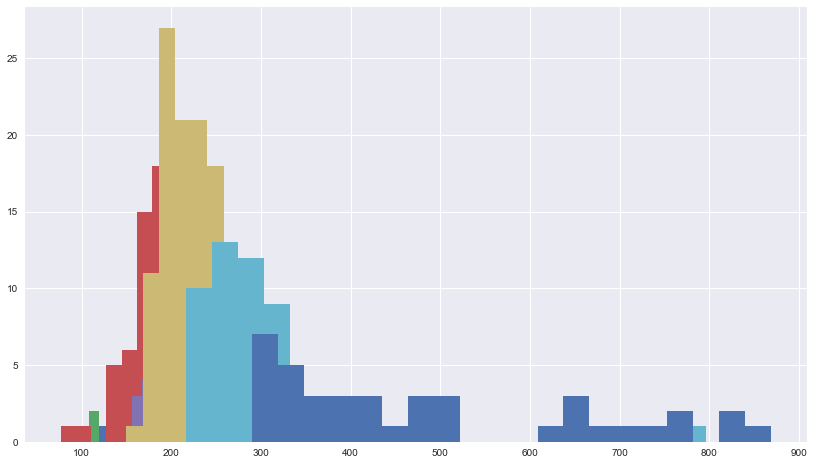

In [ ]:
df[(df.hclass_num != 1.0) & (df.hclass_num != 1.5)].groupby('hclass_num')['prange_low'].hist(bins=20, figsize=(14,8))
#plt.figure(figsize=(14,8))

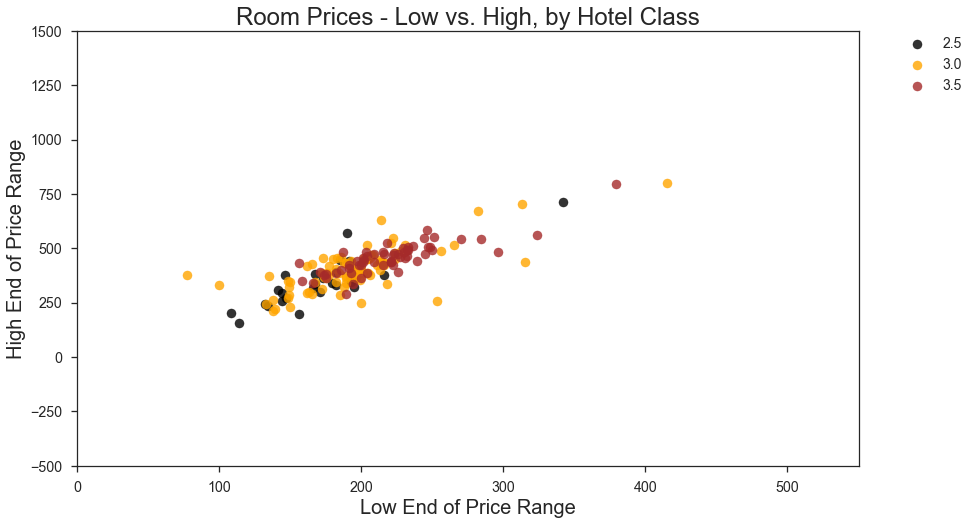

In [ ]:
sns.set_context("talk", font_scale=1.1)
sns.set_style("ticks")

plt.figure(figsize=(14,8))
plt.title('Room Prices - Low vs. High, by Hotel Class', fontsize=24)
plt.xlabel('Low End of Price Range', fontsize=20)
plt.ylabel('High End of Price Range', fontsize=20)
#plt.ylim(-500,4000)
plt.xlim(0,550)
plt.ylim(-500,1500)

#plt.scatter(df[df.hclass_num == 1.0].prange_low,df[df.hclass_num == 1.0].prange_high,color='red',label='1.0',alpha=0.8)
#plt.scatter(df[df.hclass_num == 1.5].prange_low,df[df.hclass_num == 1.5].prange_high,color='blue',label='1.5',alpha=0.8)
#plt.scatter(df[df.hclass_num == 2.0].prange_low,df[df.hclass_num == 2.0].prange_high,color='green',label='2.0',alpha=0.8)
plt.scatter(df[df.hclass_num == 2.5].prange_low,df[df.hclass_num == 2.5].prange_high,color='black',label='2.5',alpha=0.8)
plt.scatter(df[df.hclass_num == 3.0].prange_low,df[df.hclass_num == 3.0].prange_high,color='orange',label='3.0',alpha=0.8)
plt.scatter(df[df.hclass_num == 3.5].prange_low,df[df.hclass_num == 3.5].prange_high,color='brown',label='3.5',alpha=0.8)
#plt.scatter(df[df.hclass_num == 4.0].prange_low,df[df.hclass_num == 4.0].prange_high,color='yellow',label='4.0',alpha=0.8)
#plt.scatter(df[df.hclass_num == 4.5].prange_low,df[df.hclass_num == 4.5].prange_high,color='sandybrown',label='4.5',alpha=0.8)
#plt.scatter(df[df.hclass_num == 5.0].prange_low,df[df.hclass_num == 5.0].prange_high,color='c',label='5.0',alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

plt.show()

In [ ]:
df[df.n_reviews > 15000]['name']

153    Row NYC Hotel
Name: name, dtype: object

In [ ]:
df.columns

Index([             u'name',         u'n_reviews',           u'st_addr',
                    u'city',             u'state',            u'zip_cd',
            u'excellent_ct',       u'verygood_ct',        u'average_ct',
                 u'poor_ct',       u'terrible_ct',          u'families',
                 u'couples',              u'solo',          u'business',
                 u'friends',            u'spring',            u'summer',
                    u'fall',            u'winter',       u'description',
                u'rank_num',         u'rooms_num',        u'prange_low',
             u'prange_high',      u'prange_range',        u'hclass_num',
                   u'zip_5',         u'full_addr',         u'longitude',
                u'latitude',        u'rank_group',         u'amen_wifi',
       u'amen_room_service',   u'amen_restaurant',   u'amen_bar_lounge',
                u'amen_gym',          u'amen_spa',    u'amen_breakfast',
               u'amen_pool',     u'amen_internet', 

In [ ]:
df[['name','rank_num','hclass_num','prange_low','prange_high']].to_csv('hotel_names_and_prices.csv')

In [ ]:
#SAVE HOTEL-LEVEL DATA TO PICKLE FILE
df.to_pickle('my_df.pickle')

In [ ]:
df2 = pd.read_pickle('my_df.pickle')

In [ ]:
ranks_list = df2.rank_num.unique().tolist()
ranks_list.sort()
ranks_list

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [ ]:
df2.rank_num.unique().size

446

In [ ]:
#Ranks missing: 432, 421, 392 (shift values so there are no gaps)
def shift_values(orig_val):
    if orig_val <= 391:
        new_val = orig_val
    elif (orig_val > 391) & (orig_val <= 420):
        new_val = orig_val - 1
    elif (orig_val > 421) & (orig_val <= 431):
        new_val = orig_val - 2
    elif orig_val > 432:
        new_val = orig_val - 3
    return new_val

In [ ]:
df2['rank_num'] = df2.rank_num.apply(lambda x: shift_values(x))

In [ ]:
ranks_list_mdfd = df2.rank_num.unique().tolist()
ranks_list_mdfd.sort()
ranks_list_mdfd

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139

In [ ]:
df2['top30'] = df2.rank_num.apply(lambda x: 1 if x <= 30 else 0)

In [ ]:
df2.top30.value_counts()

0    416
1     30
Name: top30, dtype: int64

In [ ]:
df2['n_english_reviews'] = df2.spring + df2.summer + df2.fall + df2.winter

In [ ]:
df2['pct_english_reviews'] = df2.n_english_reviews / df2.n_reviews

In [ ]:
count_cols = {'rating_cts': ['excellent_ct','verygood_ct','average_ct','poor_ct','terrible_ct'],
             'travel_type_cts': ['families','couples','solo','business','friends'],
             'season_cts': ['spring','summer','fall','winter']}

In [ ]:
count_cols.items()

[('rating_cts',
  ['excellent_ct', 'verygood_ct', 'average_ct', 'poor_ct', 'terrible_ct']),
 ('travel_type_cts', ['families', 'couples', 'solo', 'business', 'friends']),
 ('season_cts', ['spring', 'summer', 'fall', 'winter'])]

In [ ]:
for item in count_cols.items():
    for count_col in item[1]:
        print count_col

excellent_ct
verygood_ct
average_ct
poor_ct
terrible_ct
families
couples
solo
business
friends
spring
summer
fall
winter


In [ ]:
for item in count_cols.items():
    #dynamic string to be used for naming column with total of category counts
    item_ct = item[0].split('_')[0] + '_ct'
    df2[item_ct] = 0.
    #dynamic string to be used for naming column with total of category percentages
    item_pct = item[0].split('_')[0] + '_pct'
    df2[item_pct] = 0.
    for cc in item[1]:
        cc_pct = cc.split('_')[0] + '_pct'
        df2[cc_pct] = df2[cc] / df2.n_english_reviews
        #df2[item_ct] += df2[cc]
        #df2[item_pct] += df2[cc_pct]

df2['travel_type_pct_unk'] = 1. - (df2.families_pct + df2.couples_pct + df2.solo_pct + df2.business_pct + df2.friends_pct)

In [ ]:
df2[['name','n_reviews','n_english_reviews','pct_english_reviews']].head()

name  n_reviews  \
0                       Loews Regency New York Hotel       1355   
1  The Towers of the Waldorf Astoria - TEMPORARIL...       2016   
2                Langham Place New York Fifth Avenue       2065   
3                                           The Mark        687   
4                             The St. Regis New York        633   

   n_english_reviews  pct_english_reviews  
0             1220.0             0.900369  
1             1830.0             0.907738  
2             1743.0             0.844068  
3              589.0             0.857351  
4              573.0             0.905213

In [ ]:
df2[['excellent_pct','verygood_pct','average_pct','poor_pct','terrible_pct']].head()

excellent_pct  verygood_pct  average_pct  poor_pct  terrible_pct
0       0.780328      0.132787     0.050820  0.022131      0.013934
1       0.754645      0.133880     0.058470  0.037705      0.015301
2       0.812966      0.116466     0.041308  0.018933      0.010327
3       0.787776      0.147708     0.040747  0.013582      0.010187
4       0.781850      0.122164     0.059337  0.020942      0.015707

In [ ]:
df2[['spring_pct','summer_pct','fall_pct','winter_pct']].head()

spring_pct  summer_pct  fall_pct  winter_pct
0    0.258197    0.283607  0.223770    0.234426
1    0.229508    0.288525  0.208743    0.273224
2    0.247849    0.259897  0.238095    0.254159
3    0.193548    0.305603  0.264856    0.235993
4    0.216405    0.244328  0.246073    0.293194

In [ ]:
df2[['travel_type_pct_unk','families_pct','couples_pct','solo_pct','business_pct','friends_pct']].head()

travel_type_pct_unk  families_pct  couples_pct  solo_pct  business_pct  \
0             0.049180      0.315574     0.303279  0.036066      0.211475   
1             0.049180      0.345902     0.355191  0.036066      0.133333   
2             0.065404      0.256454     0.370052  0.037866      0.206540   
3             0.071307      0.195246     0.398981  0.089983      0.191851   
4             0.064572      0.225131     0.431065  0.045375      0.178010   

   friends_pct  
0     0.084426  
1     0.080328  
2     0.063683  
3     0.052632  
4     0.055846

In [ ]:
df2_miss = df2.isnull().sum().sort_values(ascending=False)
df2_miss[df2_miss > 0]

hclass_num      28
prange_range    22
prange_high     22
prange_low      22
rooms_num        6
dtype: int64

In [ ]:
df2.loc[df2['rooms_num'].isnull()]

name  n_reviews  \
99                             National at Park Towers          2   
100                                    Third Ave House          4   
307        Hilton Garden Inn New York/Midtown Park Ave        926   
315  Hilton Garden Inn New York/Manhattan-Midtown East       1128   
355                           Executive Hotel LeSoleil        616   
380              Hotel Indigo Lower East Side New York        500   

                  st_addr           city state      zip_cd  excellent_ct  \
99   315 West 57th Street  New York City    NY  10019-3158           1.0   
100         215 E 81st St  New York City    NY  10028-2625           1.0   
307          45 E 33rd St  New York City    NY  10016-5336         409.0   
315         206 E 52nd St  New York City    NY  10022-6201         514.0   
355          38 W 36th St  New York City    NY  10018-8078         313.0   
380     171 Ludlow Street  New York City    NY  10002-1501         293.0   

     verygood_ct  average_ct  poor_ct         ...           solo_pct  \
99           0.0         0.0      0.0         ...           0.000000   
100          0.0         0.0      1.0         ...           0.666667   
307        234.0        53.0     28.0         ...           0.074124   
315        289.0        92.0     34.0         ...           0.080713   
355        129.0        39.0     11.0         ...           0.070140   
380         99.0        24.0     10.0         ...           0.097222   

     business_pct  friends_pct  season_ct  season_pct  spring_pct  summer_pct  \
99       0.000000     0.000000        0.0         0.0    0.500000    0.000000   
100      0.666667     0.000000        0.0         0.0    0.000000    0.333333   
307      0.230458     0.106469        0.0         0.0    0.222372    0.195418   
315      0.230608     0.081761        0.0         0.0    0.208595    0.273585   
355      0.166333     0.078156        0.0         0.0    0.238477    0.142285   
380      0.173611     0.129630        0.0         0.0    0.300926    0.189815   

     fall_pct  winter_pct  travel_type_pct_unk  
99   0.500000    0.000000             0.000000  
100  0.333333    0.333333            -0.333333  
307  0.258760    0.323450             0.033693  
315  0.268344    0.249476             0.054507  
355  0.308617    0.310621             0.062124  
380  0.219907    0.289352             0.048611  

[6 rows x 66 columns]

In [ ]:
from fancyimpute import KNN

In [ ]:
cols_for_impute = ['n_reviews','rank_num','rooms_num','prange_low','prange_high',
                    'prange_range','hclass_num','amen_wifi','amen_room_service','amen_restaurant',
                    'amen_bar_lounge','amen_gym','amen_spa','amen_breakfast','amen_pool','amen_internet',
                    'amen_parking','n_english_reviews']
df2_for_impute = df2[cols_for_impute]
array_filled_knn = KNN(k=5).complete(df2_for_impute)

Imputing row 1/446 with 0 missing, elapsed time: 0.052
Imputing row 101/446 with 5 missing, elapsed time: 0.056
Imputing row 201/446 with 0 missing, elapsed time: 0.057
Imputing row 301/446 with 0 missing, elapsed time: 0.057
Imputing row 401/446 with 0 missing, elapsed time: 0.057


In [ ]:
df2_filled_knn = pd.DataFrame(array_filled_knn, columns=cols_for_impute)

In [ ]:
df2_filled_knn.shape

(446, 18)

In [ ]:
df2_filled_knn.isnull().sum()

n_reviews            0
rank_num             0
rooms_num            0
prange_low           0
prange_high          0
prange_range         0
hclass_num           0
amen_wifi            0
amen_room_service    0
amen_restaurant      0
amen_bar_lounge      0
amen_gym             0
amen_spa             0
amen_breakfast       0
amen_pool            0
amen_internet        0
amen_parking         0
n_english_reviews    0
dtype: int64

In [ ]:
df2.drop(cols_for_impute, axis=1, inplace=True)

In [ ]:
df2.columns

Index([               u'name',             u'st_addr',                u'city',
                     u'state',              u'zip_cd',        u'excellent_ct',
               u'verygood_ct',          u'average_ct',             u'poor_ct',
               u'terrible_ct',            u'families',             u'couples',
                      u'solo',            u'business',             u'friends',
                    u'spring',              u'summer',                u'fall',
                    u'winter',         u'description',               u'zip_5',
                 u'full_addr',           u'longitude',            u'latitude',
                u'rank_group',               u'top30', u'pct_english_reviews',
                 u'rating_ct',          u'rating_pct',       u'excellent_pct',
              u'verygood_pct',         u'average_pct',            u'poor_pct',
              u'terrible_pct',           u'travel_ct',          u'travel_pct',
              u'families_pct',         u'couples_pct

In [ ]:
df2_filledin = pd.concat([df2,df2_filled_knn],axis=1)

In [ ]:
print df2.shape, df2_filled_knn.shape, df2_filledin.shape

(446, 48) (446, 18) (446, 66)


In [ ]:
df2_filledin.hclass_num.unique()

array([ 3.5       ,  5.        ,  4.5       ,  4.        ,  3.        ,
        2.        ,  3.1614507 ,  2.5       ,  3.24511982,  3.62087949,
        2.55732466,  3.06886431,  1.5       ,  2.51467582,  3.90299289,
        3.23112809,  1.        ,  2.7511178 ,  2.58378577,  2.81227851,
        3.71388554,  3.56211855,  3.23007926,  3.35065197,  3.86311923,
        2.97473412,  3.47705073,  3.46393902,  3.4477837 ,  3.79253053,
        3.79736988,  3.30536893,  2.95172379,  2.92417048,  3.148012  ,
        2.72941823,  2.93045089])

In [ ]:
df2_filledin['hclass_num'] = df2_filledin.hclass_num.apply(lambda x: round(x * 2) / 2)

In [ ]:
df2_filledin.hclass_num.unique()

array([ 3.5,  5. ,  4.5,  4. ,  3. ,  2. ,  2.5,  1.5,  1. ])

In [ ]:
#convert hotel class values to dummies
df2_filledin = pd.get_dummies(df2_filledin, columns=['hclass_num'])

In [ ]:
#convert zip5 values to dummies
df2_filledin = pd.get_dummies(df2_filledin, columns=['zip_5'])

In [ ]:
df2 = df2_filledin

In [ ]:
df2.drop(['rating_pct','season_pct','travel_pct'],axis=1,inplace=True)

In [ ]:
df2.shape

(446, 101)

In [ ]:
df2.to_pickle('df_446.pickle')